In [174]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as itp
#导入插值库，读者可以dir(itp)查看里面有哪些插值函数

x=np.array([1,3,7,14,30])
print x
#0.6071,
y=np.array([0.6071,0.4541,0.3435,0.2454,0.1800])
print y

[ 1  3  7 14 30]
[ 0.6071  0.4541  0.3435  0.2454  0.18  ]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
<class 'scipy.interpolate._cubic.PchipInterpolator'>
[ 0.6071      0.51811718  0.4541      0.41630907  0.38695958  0.3635303
  0.3435      0.32481561  0.30727144  0.29111738  0.27660332  0.26397914
  0.25349474  0.2454      0.23867436  0.2321519   0.22586446  0.21984386
  0.21412196  0.20873059  0.20370158  0.19906677  0.194858    0.1911071
  0.18784592  0.18510629  0.18292004  0.18131902  0.18033506  0.18
  0.18034567  0.18140392  0.18320658  0.18578548  0.18917247  0.19339937
  0.19849804  0.2045003   0.211438    0.21934296]
[ 3  7 14]
[ 0.4541  0.3435  0.2454]


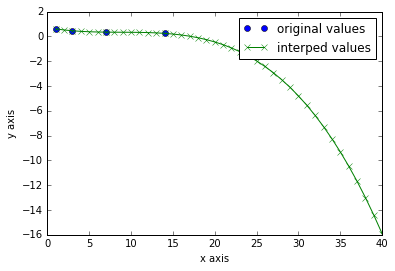

array(0.21832157757701312)

In [139]:
xvals = range(1,41)
print xvals
yinterp = np.interp(xvals, x, y)
yinterp = itp.spline(x,y,xvals)#调用样条插值函数


#PCHIP一维单调立方插值
f = itp.PchipInterpolator(x,y)
yinterp = f(xvals)

#PCHIP插值
yinterp = itp.pchip_interpolate(x,y,xvals)

#Akima interpolator
#f = itp.Akima1DInterpolator(x,y)
#yinterp = f(xvals)

print type(f)
print yinterp

#1-D插值
#f=itp.interp1d(x, y, kind='cubic')
#yinterp=f(xvals)

# 1-d 样条插值
print x[1:-1]
print y[1:-1]
f=itp.splrep(x[:-1], y[:-1], s=0)
yinterp=itp.splev(xvals,f,der=0)

# LSQUnivariateSpline
f = itp.InterpolatedUnivariateSpline(x[:-1], y[:-1])
yinterp = f(xvals)



plot1=plt.plot(x, y, 'o',label='original values')
plot2=plt.plot(xvals, yinterp, '-x',label='interped values')
#plot1=plt.plot(x, y, 'o',label=u'真实值')#采用unicode编码
#plot2=plt.plot(xvals, yinterp, '-x',label=u'插值')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.show()
f2(20)

In [169]:
#拟合
#指数幂数拟合
from scipy.optimize import curve_fit  
def func(x, a, b, c):  
    return a * np.exp(-b * x) + c  

In [170]:
popt, pcov = curve_fit(func, x[1:-1], y[1:-1])
yinterp = [func(i, popt[0],popt[1],popt[2]) for i in xvals]
print popt[0],popt[1],popt[2]
print yinterp[30]
print yinterp[39]

0.405728379817 0.127588584284 0.177404349458
0.185175652156
0.179869223109


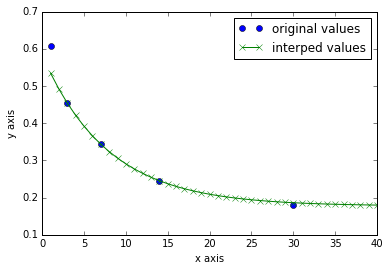

In [171]:
plot1=plt.plot(x, y, 'o',label='original values')
plot2=plt.plot(xvals, yinterp, '-x',label='interped values')
#plot1=plt.plot(x, y, 'o',label=u'真实值')#采用unicode编码
#plot2=plt.plot(xvals, yinterp, '-x',label=u'插值')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.show()

-0.190830486374 -0.354007524683
0.165273822239
0.140619809395


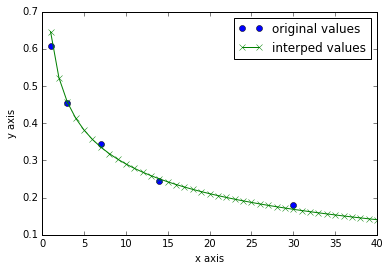

In [172]:
#指数拟合
def fund(x, a, b):  
    return x**a + b
popt, pcov = curve_fit(fund, x[1:-1], y[1:-1])
yinterp = [fund(i, popt[0],popt[1]) for i in xvals]
print popt[0],popt[1]
print yinterp[30]
print yinterp[39]

plot1=plt.plot(x, y, 'o',label='original values')
plot2=plt.plot(xvals, yinterp, '-x',label='interped values')
#plot1=plt.plot(x, y, 'o',label=u'真实值')#采用unicode编码
#plot2=plt.plot(xvals, yinterp, '-x',label=u'插值')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.show()

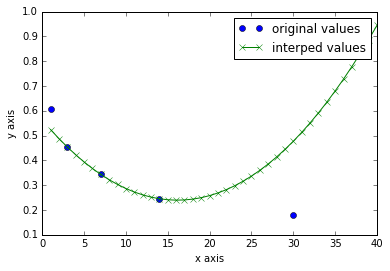

In [173]:
#多项式拟合,跑偏了

cof = np.polyfit(x[1:-1],y[1:-1],2) 
yinterp=np.poly1d(cof)(xvals)
plot1=plt.plot(x, y, 'o',label='original values')
plot2=plt.plot(xvals, yinterp, '-x',label='interped values')
#plot1=plt.plot(x, y, 'o',label=u'真实值')#采用unicode编码
#plot2=plt.plot(xvals, yinterp, '-x',label=u'插值')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.show()